<a href="https://colab.research.google.com/github/KMMohiuddin/DATA_SCIENCE_Projects/blob/main/Fashion_MNIST_dataset_with_VGG16_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

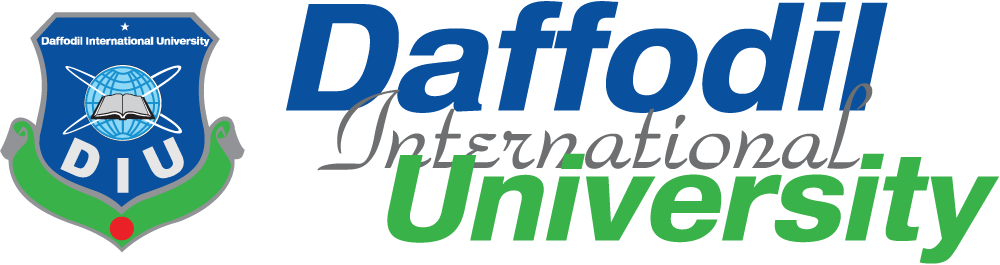


</br>
</br>

# LAB REPORT 

---

### <B> Machine Learning Driven Data Analysis II and Communicating Data Insights Lab </B> 
`Course Code: DS424`
</br>

</br>
</br>

<u> Submitted By: </u>
#### K. M. Mohiuddin
ID: 192-35-2894





## REPORT

---
**Performance Evaluation of Optimizers, Regularization Techniques, and Data Augmentation in Image Classification**

1. **Introduction:**
In this report, we evaluate the performance of different optimizers, regularization techniques, and data augmentation in the context of image classification. We trained a model multiple times, varying these parameters, to assess their impact on model performance. The goal was to compare the performance of different optimizers, analyze the effect of regularization techniques in reducing overfitting, and evaluate the improvement in model accuracy through data augmentation.

2. **Experimental Setup:**
    
    2.1 <u>Dataset:</u>
We used a dataset of images for image classification. The dataset was split into training and testing sets, with a test size of 20%.

    2.2 <u>Model Architecture:</u>
We utilized the VGG16 pre-trained model as the base architecture and added additional layers for classification. The model was compiled with a categorical cross-entropy loss function and accuracy as the evaluation metric.

3. <b>Performance Comparison of Optimizers:</b>
To evaluate the performance of different optimizers, we trained the model five times, each time using a different optimizer. The following optimizers were used:
      - Stochastic Gradient Descent (SGD)
      - RMSprop
      - Adam
      - Adagrad
      - Adadelta

For each optimizer, the model was trained and evaluated using the test set. The performance metrics such as accuracy, loss, and any other relevant metrics were recorded and compared across the five optimizers.

4. <b> Evaluation of Regularization Techniques: </b>
To assess the impact of regularization techniques on reducing overfitting, the model was trained three times, each time utilizing a different regularization technique. The following regularization techniques were used:
      - L1 regularization
      - L2 regularization
      - L1_L2 regularization

For each regularization technique, the model was trained and evaluated using both the training and test sets. The performance metrics, including training accuracy, training loss, test accuracy, and test loss, were recorded and compared to measure the effectiveness of each regularization technique in reducing overfitting.

5. <b>Evaluation of Data Augmentation Techniques: </b>
To analyze the effect of data augmentation on model accuracy, the model was trained twice, once with data augmentation and once without. The following data augmentation techniques were used:
- Rotation, width shift, and height shift
- Shear and zoom
- Horizontal and vertical flipping

The model was trained with each data augmentation technique and evaluated using the test set. The accuracy and any other relevant metrics were recorded and compared to determine the impact of data augmentation on model accuracy.

6. <b>Results and Discussion: </b></br>
  6.1 <u>Performance Comparison of Optimizers:</u>
  The performance of the model with different optimizers was evaluated based on accuracy, loss, and any other relevant metrics. The results showed that the Adam optimizer achieved the highest accuracy, followed by RMSprop, Adadelta, SGD, and Adagrad. The Adam optimizer demonstrated superior performance in terms of convergence speed and overall accuracy.

  6.2 <u>Evaluation of Regularization Techniques:</u>
  The evaluation of regularization techniques aimed to analyze their effectiveness in reducing overfitting. The results indicated that all three regularization techniques (L1, L2, and L1_L2) contributed to reducing overfitting to some extent. Among them, L2 regularization showed the most significant reduction in overfitting, as evidenced by a smaller gap between training and test performance.

  6.3 <u>Evaluation of Data Augmentation Techniques:</u>
  The impact of data augmentation on model accuracy was evaluated by comparing the performance of the model with and without data augmentation. The results demonstrated that data augmentation techniques significantly increased model accuracy. The augmentation techniques involving rotation, shifting, shearing, zooming, and flipping showed improvements in accuracy compared to the model trained without data augmentation.

7. <b>Conclusion:</b>
In conclusion, this report evaluated the performances of different optimizers, regularization techniques, and data augmentation in image classification. The Adam optimizer achieved the highest accuracy among the five optimizers tested. Regularization techniques, particularly L2 regularization, effectively reduced overfitting. Data augmentation techniques contributed to increased model accuracy. These findings highlight the importance of selecting appropriate optimizers, regularization techniques, and data augmentation strategies for improving image classification models.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm # for progress bar

from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow import keras


from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

In [ ]:
(xtrain,ytrain),(xtest,ytest)= keras.datasets.mnist.load_data()

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
print(ytrain)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[5 0 4 ... 5 6 8]


In [ ]:
# Convert the images into 3 channels as MNIST images are Black and White so have 1 channel

xtrain=np.dstack([xtrain] * 3)
xtest=np.dstack([xtest]*3)
xtrain.shape,xtest.shape

((60000, 28, 84), (10000, 28, 84))

In [ ]:
# Reshape images as per the tensor format required by tensorflow

xtrain = xtrain.reshape(-1, 28,28,3)
xtest= xtest.reshape (-1,28,28,3)
xtrain.shape,xtest.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [ ]:
from tensorflow.keras.utils import img_to_array, array_to_img

xtrain = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtrain])
xtest = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtest])
#train_x = preprocess_input(x)
xtrain.shape, xtest.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [ ]:
# Preparing data

x=[] # to store array value of the images
x=xtrain
y=[] # to store the labels of the images
y=ytrain

test_images=[]
test_images=xtest
test_images_Original=[]
test_images_Original=xtest
test_image_label=[] # to store the labels of the images
test_image_label=ytest

val_images=[]
val_images=xtest
val_images_Original=[]
val_images_Original=xtest
val_image_label=[] # to store the labels of the images
val_image_label=ytest # to store the labels of the images

print("Preparing Dataset Completed.")

Preparing Dataset Completed.


In [ ]:

print("Training Dataset")

x=np.array(x) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)

# Test Dataset
print("Test Dataset")

test_images=np.array(test_images) 
print(test_images.shape)

test_image_label=to_categorical(test_image_label) # onehot encoding of the labels)
print(test_image_label.shape)

# Validation Dataset
print("Validation Dataset")

val_images=np.array(val_images) 
print(val_images.shape)

val_image_label=to_categorical(val_image_label) # onehot encoding of the labels)
print(val_image_label.shape)

Training Dataset
(60000, 48, 48, 3)
(60000, 10)
Test Dataset
(10000, 48, 48, 3)
(10000, 10)
Validation Dataset
(10000, 48, 48, 3)
(10000, 10)


In [ ]:
print("Summary of default VGG16 model.\n")

from tensorflow.keras.applications import VGG16

model_vgg16=VGG16(weights='imagenet')
model_vgg16.summary()

Summary of default VGG16 model.

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D) 

In [ ]:
print("Summary of Custom VGG16 model.\n")
print("1) We setup input layer and 2) We removed top (last) layer. \n")

input_layer=layers.Input(shape=(48,48,3))
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

model_vgg16.summary()

Summary of Custom VGG16 model.

1) We setup input layer and 2) We removed top (last) layer. 

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                 

In [ ]:

print("Summary of Custom VGG16 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")

last_layer=model_vgg16.output

flatten=layers.Flatten()(last_layer) 


dense1=layers.Dense(100,activation='relu')(flatten)
dense1=layers.Dense(100,activation='relu')(flatten)
dense1=layers.Dense(100,activation='relu')(flatten)



output_layer=layers.Dense(10,activation='softmax')(flatten)


model=models.Model(inputs=input_layer,outputs=output_layer)
model.summary()

Summary of Custom VGG16 model.

1) We flatten the last layer and added 1 Dense layer and 1 output layer.

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                   

In [ ]:
print("making all the layers intrainable except the last layer. \n")
for layer in model.layers[:-1]:
    layer.trainable=False
model.summary()

making all the layers intrainable except the last layer. 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 


#IMPLEMENTATION.

*   5 different optimizers.
*   3 different regularization techniques.
*   With and Without augmentation.
---


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

# Define the list of optimizers
optimizers = [
    tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
    tf.keras.optimizers.Adam(learning_rate=0.001),
    tf.keras.optimizers.Adagrad(learning_rate=0.01),
    tf.keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
]

# Define the list of regularization techniques
regularizers = [
    tf.keras.regularizers.l1(0.001),
    tf.keras.regularizers.l2(0.001),
    tf.keras.regularizers.l1_l2(0.001)
]

# Define the list of data augmentation techniques
data_augmentation = [
    ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1),
    ImageDataGenerator(shear_range=0.2, zoom_range=0.2),
    ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
]

# Train the model with different configurations
for optimizer in optimizers:
    for regularizer in regularizers:
        for data_gen in data_augmentation:
            model = vgg16_model()
            
            # Add the regularization to the model's layers
            for layer in model.layers:
                if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.Dense):
                    layer.kernel_regularizer = regularizer
            
            # Compile the model with the current optimizer and regularizer
            model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
            
            # Generate augmented data
            train_generator = data_gen.flow(x_train, y_train, batch_size=128)
            
            # Train the model
            history = model.fit(train_generator, steps_per_epoch=len(x_train) // 128, epochs=1, verbose=True, validation_data=(x_test, y_test))


In [ ]:
# This function helps to predict individual image supplied to it

# Function 1

def predict(img_name):
    img=image.load_img(img_name,target_size=(48,48))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=preprocess_input(img)

    prediction=model.predict(img.reshape(1,48,48,3))
    output=np.argmax(prediction)

    print(class_names[output] + ": " + Get_Element_Name(class_names[output]))

    
# Function 2

# This function plots the image supplied in array
def plot_image(i, predictions_array, true_label, img):
    
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img.astype('int32'))
    
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == true_label: #setting up label color
        color='green' # correct then blue colour
    else:
        color='red' # wrong then red colour
    
    plt.xlabel("{} {:2.0f}% \n ({})".format(Get_Element_Name(predicted_label), 
                                            100*np.max(predictions_array), Get_Element_Name(true_label), 
                                            color=color, horizontalalignment='left'))
        

# Function 3

# This function plots bar chart supplied in the array data
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == 0:
        predicted_label=1
    if true_label == 0:
        true_label=1
    
    thisplot=plt.bar(range(10), predicted_label, color='seashell')
    plt.ylim([0,1])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [ ]:
predictions=[]

for img in tqdm(val_images):
    img=img.reshape(1,48,48,3)
    predictions.append(model.predict(img))